# Support Vector Machine (SVM)

SVM doesn't support multiclass classification natively

- Two types
    - SVC
    - SVR

## Theoritical Part

### What Are the Basic Assumption?
There are no such assumptions

### Advantages
1. SVM is more effective in high dimensional spaces.
2. SVM is relatively memory efficient.
3. SVM’s are very good when we have no idea on the data.
4. Works well with even unstructured and semi structured data like text, Images and trees.
5. The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
6. SVM models have generalization in practice, the risk of over-fitting is less in SVM.

### Disadvantages
1. More Training Time is required for larger dataset
2. It is difficult to choose a good kernel function
https://www.youtube.com/watch?v=mTyT-oHoivA
3. The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

### Whether Feature Scaling is required?
Yes

### Impact of Missing Values?
Although SVMs are an attractive option when constructing a classifier, SVMs do not easily accommodate missing covariate information. Similar to other prediction and classification methods, in-attention to missing data when constructing an SVM can impact the accuracy and utility of the resulting classifier.

### Impact of outliers?
It is usually sensitive to outliers
https://arxiv.org/abs/1409.0934#:~:text=Despite%20its%20popularity%2C%20SVM%20has,causes%20the%20sensitivity%20to%20outliers.

### Impact of Missing Values?
Although SVMs are an attractive option when constructing a classifier, SVMs do not easily accommodate missing covariate information. Similar to other prediction and classification methods, in-attention to missing data when constructing an SVM can impact the accuracy
and utility of the resulting classifier.

### Impact of outliers?
It is usually sensitive to outliers
https://arxiv.org/abs/1409.0934#:~:text=Despite%20its%20popularity%2C%20SVM%20has,causes%20the%20sensitivity%20to%20outliers.

### Types of Problems it can solve(Supervised)
1. Classification
2. Regression

### Overfitting And Underfitting
In SVM, to avoid overfitting, we choose a Soft Margin, instead of a Hard one i.e. we let some data points enter our margin intentionally (but we still penalize it) so that our classifier don't overfit on our training sample

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### Different Problem statement you can solve using SVM
1. We can use SVM with every ANN usecases
2. Intrusion Detection
3. Handwriting Recognition

### Practical Implementation
1. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

### Performance Metrics

#### Classification
1. Confusion Matrix 
2. Precision,Recall, F1 score

#### Regression
1. R2,Adjusted R2
2. MSE,RMSE,MAE

## My Explination

<img src="https://raw.githubusercontent.com/Mhnd-DS/ML-Models-Journey/main/Support%20Vector%20Machine/SVM1.jpg" alt="drawing" width="800"/>

<img src="https://raw.githubusercontent.com/Mhnd-DS/ML-Models-Journey/main/Support%20Vector%20Machine/SVM2.jpg" alt="drawing" width="800"/>

## Implementation Part

In [113]:
import pandas as pd


from sklearn import set_config
set_config(print_changed_only=False)


from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [17]:
df['target'] = iris.target

In [19]:
df['flower_name'] = df['target'].apply(lambda x : iris.target_names[x])

In [21]:
df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# spe each type

In [53]:
df['flower_name'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
for x in df['flower_name'].unique():
     vars()['df_'+str(x)] = df[df['flower_name'] == x]

In [54]:
df_virginica[:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica


In [74]:
def scatter_plot(df1 ,df2,feature1, feature2):
    plt.xlabel(feature1)
    plt.ylabel(feature2)

    plt.title(feature1+" vs "+feature1)
    plt.scatter(df1[feature1], df1[feature2],color="green",marker='+')
    plt.scatter(df2[feature1], df2[feature2],color="blue",marker='o')
    

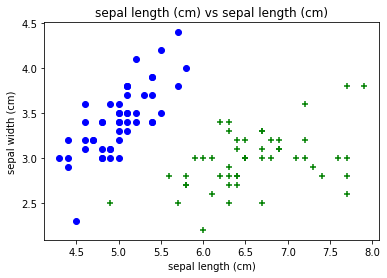

In [75]:
scatter_plot(df_virginica, df_setosa,'sepal length (cm)', 'sepal width (cm)')

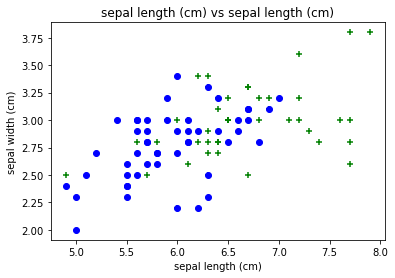

In [76]:
scatter_plot(df_virginica, df_versicolor,'sepal length (cm)', 'sepal width (cm)')

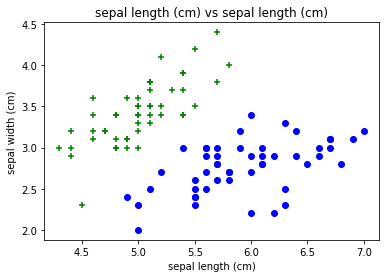

In [77]:
scatter_plot(df_setosa, df_versicolor,'sepal length (cm)', 'sepal width (cm)')

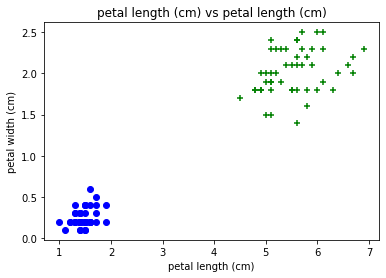

In [78]:
scatter_plot(df_virginica, df_setosa,'petal length (cm)', 'petal width (cm)')

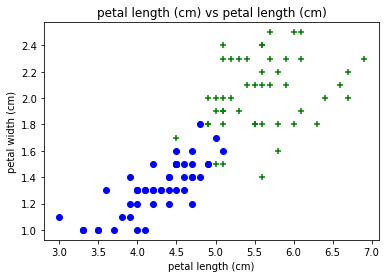

In [79]:
scatter_plot(df_virginica, df_versicolor,'petal length (cm)', 'petal width (cm)')

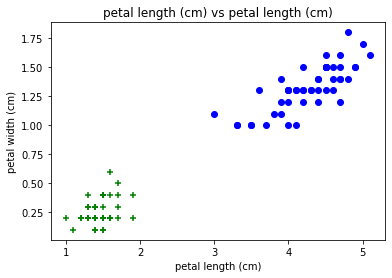

In [80]:
scatter_plot(df_setosa, df_versicolor,'petal length (cm)', 'petal width (cm)')

In [90]:
df.corrwith(df["target"])

sepal length (cm)    0.782561
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
dtype: float64

In [88]:
df.drop(['sepal width (cm)'] , axis = 1 , inplace = True)

In [89]:
df

,sepal length (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,1.4,0.2,0,setosa
1,4.9,1.4,0.2,0,setosa
2,4.7,1.3,0.2,0,setosa
3,4.6,1.5,0.2,0,setosa
4,5.0,1.4,0.2,0,setosa
...,...,...,...,...,...
145,6.7,5.2,2.3,2,virginica
146,6.3,5.0,1.9,2,virginica
147,6.5,5.2,2.0,2,virginica
148,6.2,5.4,2.3,2,virginica


In [198]:
X = df.drop(['target','flower_name'], axis=1)
y = df.target

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [200]:
from sklearn.svm import SVC
model = SVC(C = 10).fit(X_train, y_train)

In [201]:
model.score(X_test, y_test)

0.9777777777777777

In [202]:
y_pred = model.predict(X_test)

AxesSubplot(0.125,0.125;0.62x0.755)


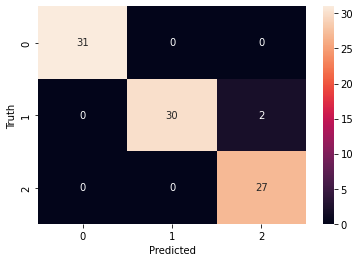

In [203]:
cm = confusion_matrix(y_test , y_pred )

print(sn.heatmap(cm , annot = True))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [204]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      0.94      0.97        32
           2       0.93      1.00      0.96        27

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



In [205]:
support_vector_indices = model.support_
print(support_vector_indices)


support_vectors_per_class = model.n_support_
print(support_vectors_per_class)


support_vectors = model.support_vectors_
print(support_vectors)

[ 1 15 10 17 32 36 39 42 54 12 18 23 24 25 27 46 50 55]
[2 7 9]
[[4.7 1.6 0.2]
 [5.7 1.7 0.3]
 [6.7 5.  1.7]
 [6.  4.5 1.6]
 [5.4 4.5 1.5]
 [5.1 3.  1.1]
 [6.5 4.6 1.5]
 [6.1 4.7 1.2]
 [6.3 4.9 1.5]
 [6.3 5.1 1.5]
 [6.3 4.9 1.8]
 [4.9 4.5 1.7]
 [5.9 5.1 1.8]
 [6.9 5.1 2.3]
 [7.2 5.8 1.6]
 [7.7 6.7 2.2]
 [6.  4.8 1.8]
 [6.1 4.9 1.8]]


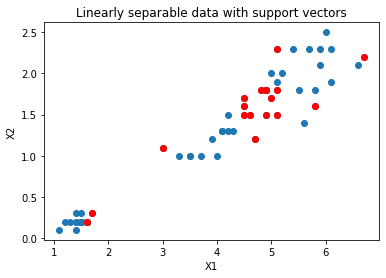

In [217]:
plt.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'])
plt.scatter(support_vectors[:,1], support_vectors[:,2], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()